In [1]:
!python --version

Python 3.8.18


In [2]:
from matplotlib.ticker import LinearLocator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
result = pd.read_csv("finetuned_result.csv")
df = result

In [4]:
df

,model_name,a_base,a_CTC,a_freeze,f_base,f_CTC,f_freeze,p_base,p_CTC,p_freeze,t_base,t_CTC,t_freeze
0,w2v2-large,0.6909,0.6880,0.6940,0.7942,0.7866,0.7819,0.7862,0.7847,0.7758,0.7275,0.7178,0.7233
1,w2v2-large-960h,0.7063,0.7080,0.7019,0.7734,0.7698,0.7739,0.7732,0.7713,0.7748,0.7335,0.7287,0.7272
2,w2v2-large-lv60,0.6232,0.6659,0.6493,0.6756,0.7201,0.7489,0.6718,0.7301,0.7423,0.6415,0.6860,0.6785
3,w2v2-xlsr-53,0.6778,0.6912,0.6449,0.7404,0.7516,0.6941,0.7341,0.7507,0.6911,0.6938,0.7062,0.6640
4,w2v2-xls-r-300m,0.6327,0.6493,0.6606,0.6927,0.7047,0.7346,0.6806,0.6919,0.7268,0.6474,0.6632,0.6789
5,hb-large-ll60k,0.6200,0.6163,0.6978,0.6915,0.6868,0.7633,0.6834,0.6805,0.7602,0.6330,0.6328,0.7159
6,hb-base-ls960,0.6731,0.6263,0.6742,0.7604,0.7083,0.7431,0.7591,0.6930,0.7389,0.7038,0.6487,0.6975
7,hb-xlarge-ll60k,0.6314,0.6858,0.7022,0.7037,0.7594,0.7855,0.6932,0.7612,0.7834,0.6459,0.7047,0.7277
8,hb-xlarge-ls960-ft,0.6699,0.7188,0.7224,0.7434,0.7967,0.7875,0.7411,0.7881,0.7841,0.6931,0.7343,0.7451
9,wlm-large,0.6126,0.6491,0.6557,0.6539,0.6998,0.7358,0.6440,0.6948,0.7255,0.6201,0.6590,0.6802


## fluency

In [ ]:
result = pd.read_csv("finetuned_result.csv")
score_types = ['f_base', 'f_CTC', 'f_freeze']
result_filtered = result[['model_name'] + score_types]
result_filtered

,model_name,f_base,f_CTC,f_freeze
0,w2v2-large,0.7942,0.7866,0.7819
1,w2v2-large-960h,0.7734,0.7698,0.7739
2,w2v2-large-lv60,0.6756,0.7201,0.7489
3,w2v2-xlsr-53,0.7404,0.7516,0.6941
4,w2v2-xls-r-300m,0.6927,0.7047,0.7346
5,hb-large-ll60k,0.6915,0.6868,0.7633
6,hb-base-ls960,0.7604,0.7083,0.7431
7,hb-xlarge-ll60k,0.7037,0.7594,0.7855
8,hb-xlarge-ls960-ft,0.7434,0.7967,0.7875
9,wlm-large,0.6539,0.6998,0.7358


In [14]:
mdname = list(result_filtered['model_name'])
mdname

['w2v2-large',
 'w2v2-large-960h',
 'w2v2-large-lv60',
 'w2v2-xlsr-53',
 'w2v2-xls-r-300m',
 'hb-large-ll60k',
 'hb-base-ls960',
 'hb-xlarge-ll60k',
 'hb-xlarge-ls960-ft',
 'wlm-large',
 'wlm-base-plus',
 'wlm-base-plus-sv']

/tmp/ipykernel_3982927/2613990573.py:12: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)


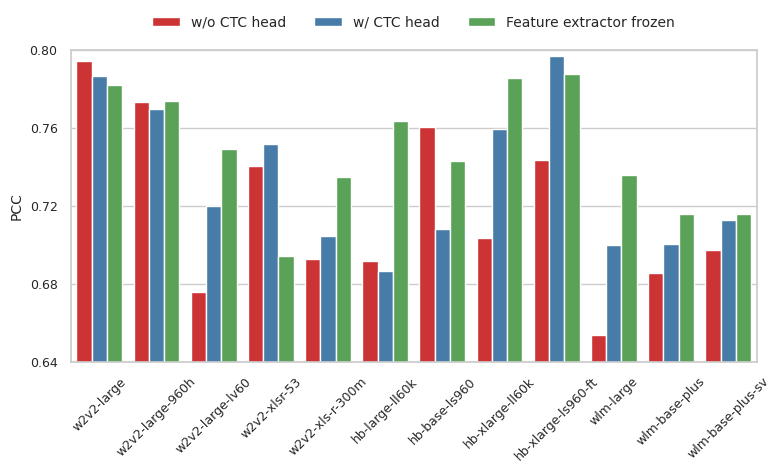

In [ ]:
df_long = pd.melt(result_filtered, id_vars='model_name', value_vars=score_types,
                  var_name='Score Type', value_name='Score')

palette = sns.color_palette("Set1")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)

# Improve the plot aesthetics
sns.set_theme(style="whitegrid")
plt.ylim(0.64, 0.8)
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=5))

handles, labels = barplot.get_legend_handles_labels()
new_labels = ['w/o CTC head', 'w/ CTC head', 'Feature extractor frozen']
plt.legend(handles=handles, labels=new_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize='small')

plt.ylabel('PCC', size=10)
plt.yticks(size=9)
plt.xlabel('')
plt.xticks(rotation=45, size=9)
plt.tight_layout()
plt.show()

## prosodic

In [ ]:
result = pd.read_csv("finetuned_result.csv")
score_types = ['p_base', 'p_CTC', 'p_freeze']
result_filtered = result[['model_name'] + score_types]
mdname = list(result_filtered['model_name'])

/tmp/ipykernel_3982927/968407612.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)


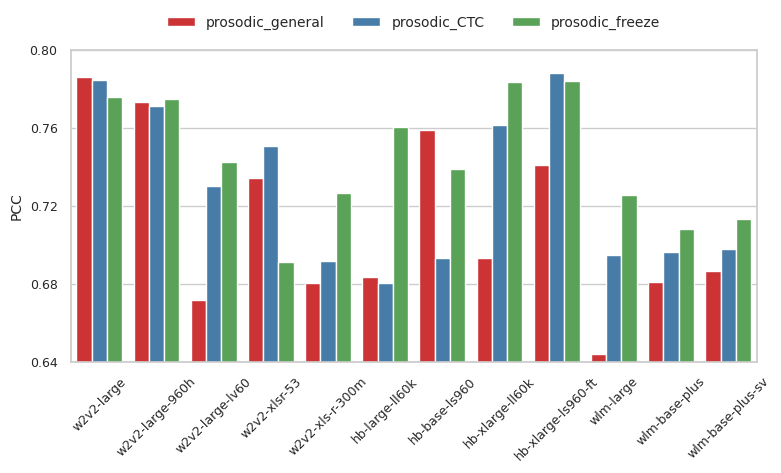

In [12]:
df_long = pd.melt(result_filtered, id_vars='model_name', value_vars=score_types,
                  var_name='Score Type', value_name='Score')
palette = sns.color_palette("Set1")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)

sns.set_theme(style="whitegrid")
plt.ylim(0.64, 0.8)
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=5))

handles, labels = barplot.get_legend_handles_labels()
new_labels = ['prosodic_general', 'prosodic_CTC', 'prosodic_freeze']
plt.legend(handles=handles, labels=new_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize='small')

plt.ylabel('PCC', size=10)
plt.yticks(size=9)

plt.xlabel('')
plt.xticks(rotation=45, size=9)

plt.tight_layout()
plt.show()

## accuracy


/tmp/ipykernel_3982927/3988469105.py:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)


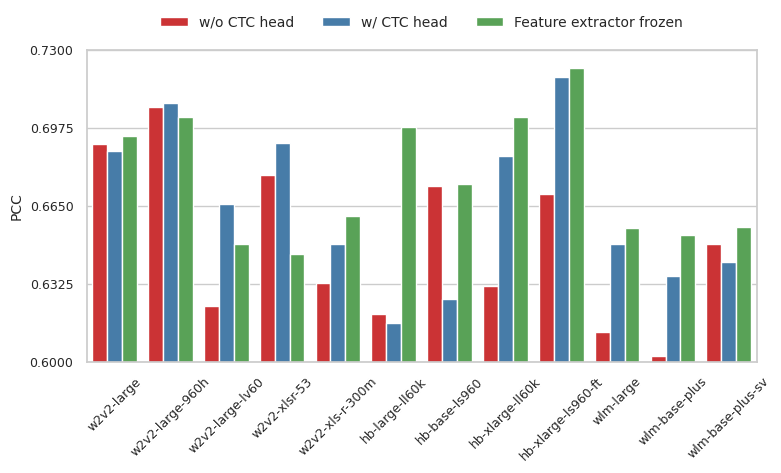

In [16]:
result = pd.read_csv("finetuned_result.csv")

score_types = ['a_base', 'a_CTC', 'a_freeze']
result_filtered = result[['model_name'] + score_types]
mdname = list(result_filtered['model_name'])

df_long = pd.melt(result_filtered, id_vars='model_name', value_vars=score_types,
                  var_name='Score Type', value_name='Score')
palette = sns.color_palette("Set1")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)

sns.set_theme(style="whitegrid")
plt.ylim(0.60, 0.73)
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=5))

handles, labels = barplot.get_legend_handles_labels()
new_labels = ['w/o CTC head', 'w/ CTC head', 'Feature extractor frozen']
plt.legend(handles=handles, labels=new_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize='small')

plt.ylabel('PCC', size=10)
plt.yticks(size=9)

plt.xlabel('')
plt.xticks(rotation=45, size=9)

plt.tight_layout()
plt.show()

## total


/tmp/ipykernel_3886554/4292973687.py:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)


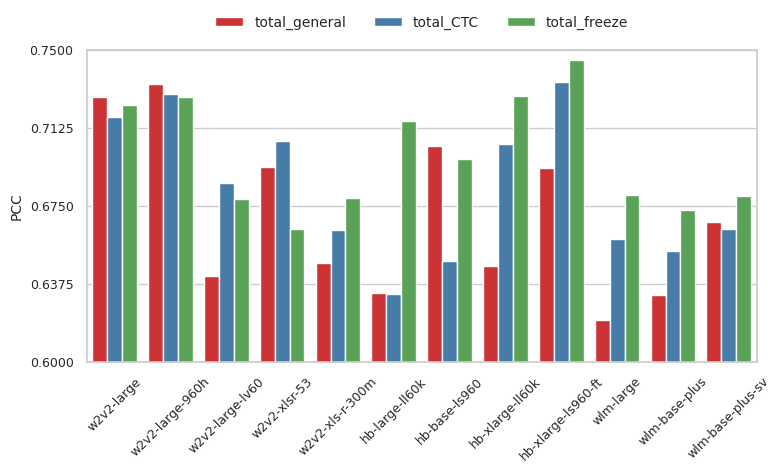

In [196]:
result = pd.read_csv("finetuned_result.csv")

score_types = ['t_base', 't_CTC', 't_freeze']
result_filtered = result[['model_name'] + score_types]
mdname = list(result_filtered['model_name'])

df_long = pd.melt(result_filtered, id_vars='model_name', value_vars=score_types,
                  var_name='Score Type', value_name='Score')
palette = sns.color_palette("Set1")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='model_name', y='Score', hue='Score Type', data=df_long, palette=palette)

sns.set_theme(style="whitegrid")
plt.ylim(0.6, 0.75)
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=5))

handles, labels = barplot.get_legend_handles_labels()
new_labels = ['total_general', 'total_CTC', 'total_freeze']
plt.legend(handles=handles, labels=new_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize='small')

plt.ylabel('PCC', size=10)
plt.yticks(size=9)

plt.xlabel('')
plt.xticks(rotation=45, size=9)

plt.tight_layout()
plt.show()